In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem:
You have recently started your job as a Data Scientist in a famous telecom company. As you
may very well know, telecoms fiercely fight for customer retention, with entire service branches
devoted to this task. This is due to the fact that retention is more cost efficient than capturing
new clients. One of your colleagues from the master got hired in the Marketing Department, and
he needs to understand the company’s clients, so he’s asked you to help him out with a descriptive
report and segmentation of the customer base. He’s specially interested in the lifetime value of loyal
customers. Thus, you can ignore (for now) those who leave the company (churn).

Prepare a descriptive report and segment the customers in the most adequate way. For this
assignment, use the data on customers.csv. Clean, organise and present an exploratory analysis
of the data. What can you tell about the customers ? 

In [2]:
df = pd.read_csv ('customers.csv') 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Analysis of leave/stay clients

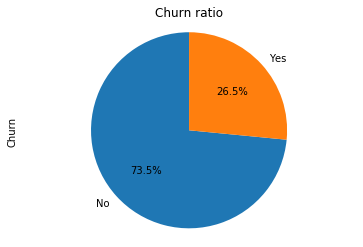

In [3]:
df.Churn.value_counts().plot.pie(autopct='%1.1f%%',shadow = False,startangle =90).axis('equal')
plt.title('Churn ratio')
plt.show()

We can see that more than 73% of clients are still with the company. 

Now we cut off the clients who have left the company

In [4]:
positive_churn = df.Churn=='Yes'
current_clients = df.drop(df[positive_churn].index)
current_clients.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


# Analysis of physical and social parameters of clients

## Gender


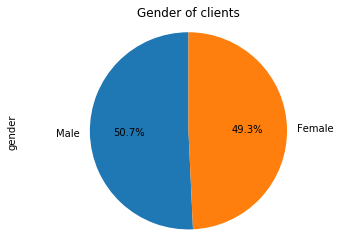

In [5]:
current_clients.gender.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Gender of clients')
plt.show()

## Age


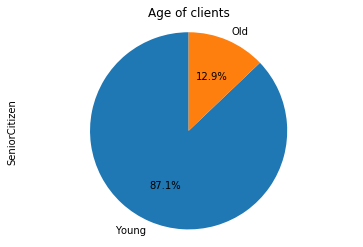

In [6]:
current_clients.SeniorCitizen.value_counts().plot.pie(labels = ["Young","Old"],autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Age of clients')
plt.show()

## Family state


### Partner

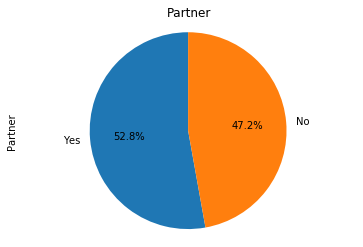

In [7]:
current_clients.Partner.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Partner')
plt.show()

### Dependents

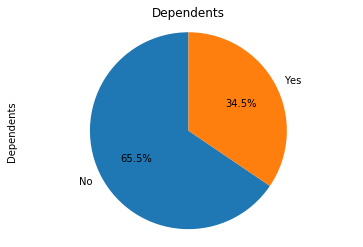

In [8]:
current_clients.Dependents.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Dependents')
plt.show()

# Analysis of service usage

## Phone services


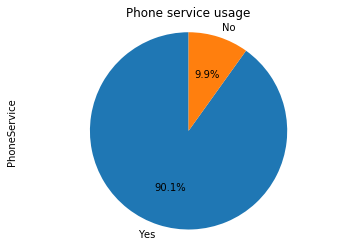

In [9]:
current_clients.PhoneService.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Phone service usage')
plt.show()

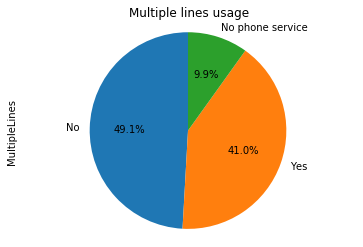

In [10]:
current_clients.MultipleLines.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Multiple lines usage')
plt.show()

Now we will have a look at the clinets which use phone service

In [11]:
no_phone = current_clients.PhoneService == 'No'
current_clients_phone = current_clients.drop(current_clients[no_phone].index)

How many clients with phones have multiple lines

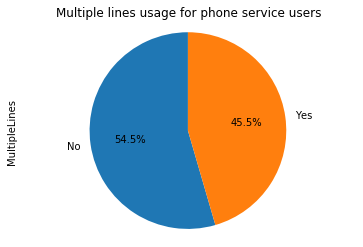

In [12]:
current_clients_phone.MultipleLines.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Multiple lines usage for phone service users')
plt.show()

## Internet services

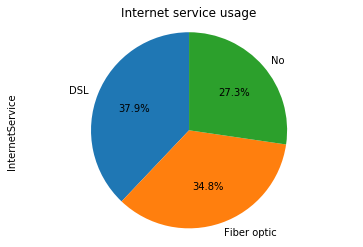

In [13]:
current_clients.InternetService.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Internet service usage')
plt.show()

### Usage of additional services for the Internet

#### Security and Backup

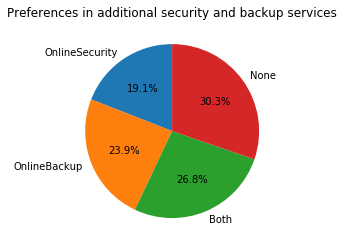

In [14]:
yes_int = current_clients[current_clients.InternetService != 'No']
sec = 0
back = 0
both = 0
none = 0
for i in yes_int.index:
    if (yes_int.OnlineSecurity[i] == 'Yes') and (yes_int.OnlineBackup[i] != 'Yes'):
        sec = sec+1
    elif (yes_int.OnlineBackup[i] == 'Yes') and (yes_int.OnlineSecurity[i] != 'Yes'):
        back = back+1
    elif (yes_int.OnlineBackup[i] == 'Yes') and (yes_int.OnlineSecurity[i] == 'Yes'):
        both = both+1
    elif (yes_int.OnlineBackup[i] != 'Yes') and (yes_int.OnlineSecurity[i] != 'Yes'):
        none = none+1
        

answer = [sec,back,both,none]
lab = ['OnlineSecurity','OnlineBackup','Both', 'None']
plt.pie(answer,labels = lab,autopct='%1.1f%%',startangle =90)
plt.title('Preferences in additional security and backup services')
plt.show()



#### Device protection


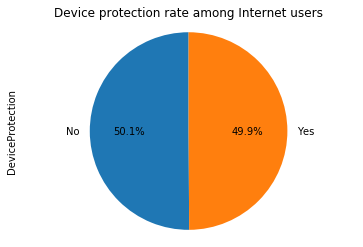

In [15]:
yes_int.DeviceProtection.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Device protection rate among Internet users')
plt.show()

#### Tech support

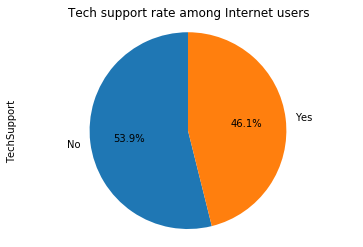

In [16]:
yes_int.TechSupport.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Tech support rate among Internet users')
plt.show()

#### Streaming preferences

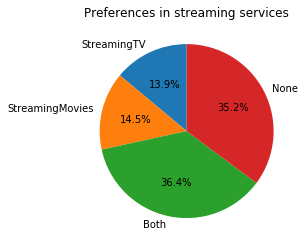

In [17]:
tv = 0
mov = 0
both = 0
none = 0
for i in yes_int.index:
    if (yes_int.StreamingTV[i] == 'Yes') and (yes_int.StreamingMovies[i] != 'Yes'):
        tv = tv+1
    elif (yes_int.StreamingMovies[i] == 'Yes') and (yes_int.StreamingTV[i] != 'Yes'):
        mov = mov+1
    elif (yes_int.StreamingTV[i] == 'Yes') and (yes_int.StreamingMovies[i] == 'Yes'):
        both = both+1
    elif (yes_int.StreamingTV[i] != 'Yes') and (yes_int.StreamingMovies[i] != 'Yes'):
        none = none+1
        

answer = [tv,mov,both,none]
lab = ['StreamingTV','StreamingMovies','Both', 'None']
plt.pie(answer,labels = lab,autopct='%1.1f%%',startangle =90)
plt.title('Preferences in streaming services')
plt.show()



# Contract analysis

## Length of the contract

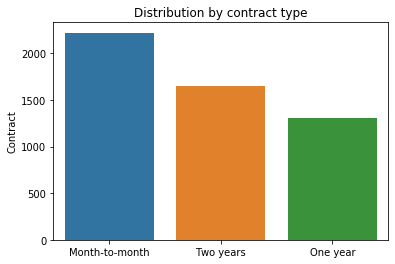

Month-to-month    2220
Two year          1647
One year          1307
Name: Contract, dtype: int64


In [18]:
sns.barplot(['Month-to-month','Two years', 'One year'],current_clients.Contract.value_counts())
plt.title('Distribution by contract type')
plt.show()
print(current_clients.Contract.value_counts())


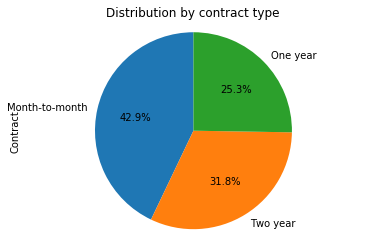

In [19]:
current_clients.Contract.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Distribution by contract type')
plt.show()

## Payment method

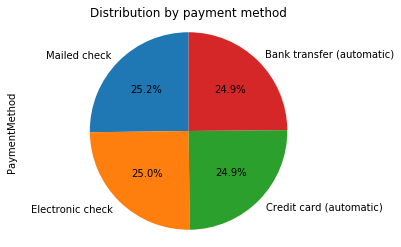

In [20]:
current_clients.PaymentMethod.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Distribution by payment method')
plt.show()

### Paperless billing

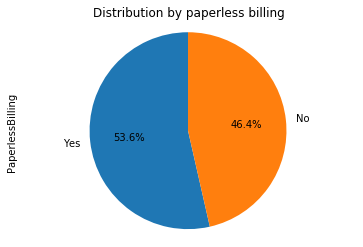

In [21]:
current_clients.PaperlessBilling.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Distribution by paperless billing')
plt.show()

# Financial data

## Distributions by tenure and  Monthly/Total Charges

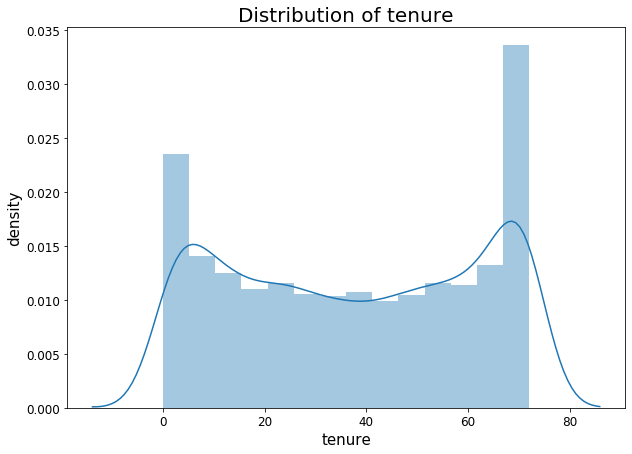

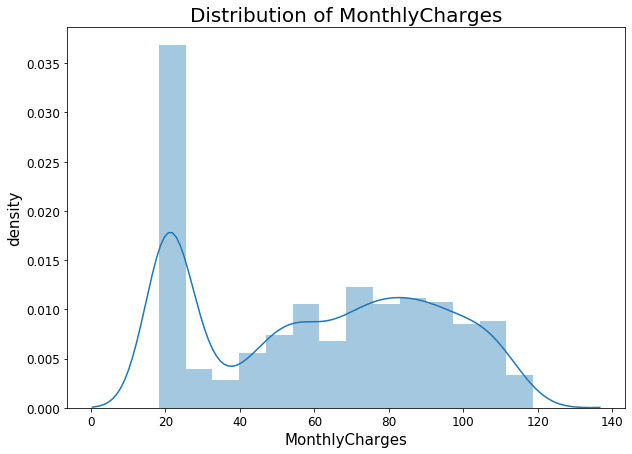

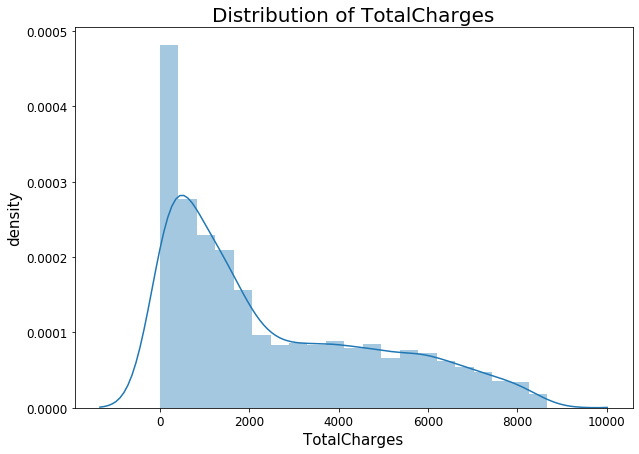

In [22]:
current_clients["TotalCharges"] = pd.to_numeric(current_clients.TotalCharges, errors='coerce').fillna(0, downcast='infer') 
current_clients["SeniorCitizen"] = current_clients.SeniorCitizen.astype('O')
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(10,7))
    sns.distplot(current_clients[col])
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel(col, fontsize=15)
    plt.ylabel("density", fontsize=15)
    plt.title(f"Distribution of {col}", fontsize=20)

## Monthly Charges analysis

Text(0.5, 0.98, 'Relation between tenure and monthly charges')

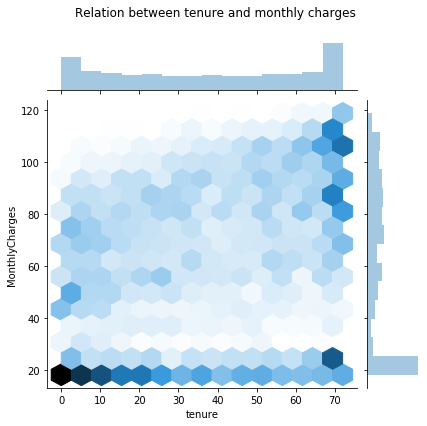

In [23]:
x="tenure"
y="MonthlyCharges"
g = sns.jointplot(x, y, data=current_clients, kind="hex")
plt.subplots_adjust(top=0.9)
g.fig.suptitle( "Relation between tenure and monthly charges")

### Phone services

Text(0.5, 1.0, 'Distribution of MonthlyCharges among phone users')

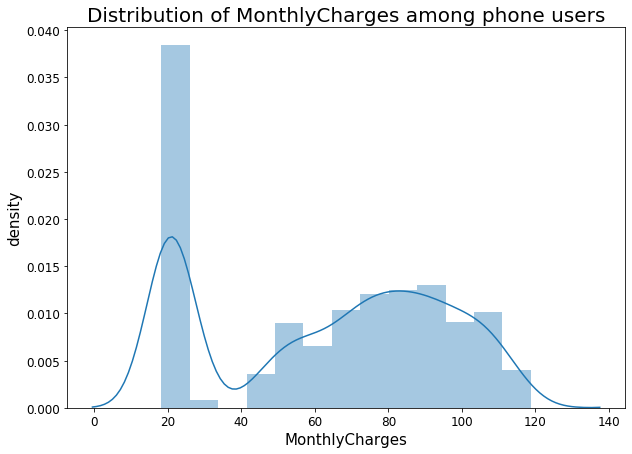

In [24]:
col = 'MonthlyCharges'
plt.figure(figsize=(10,7))
sns.distplot(current_clients_phone[col])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among phone users", fontsize=20)

#### Only phone users 

In [25]:
yes_internet = current_clients_phone.InternetService != 'No'
current_clients_phone_only = current_clients_phone.drop(current_clients_phone[yes_internet].index)

Text(0.5, 1.0, 'Distribution of MonthlyCharges among only phone users')

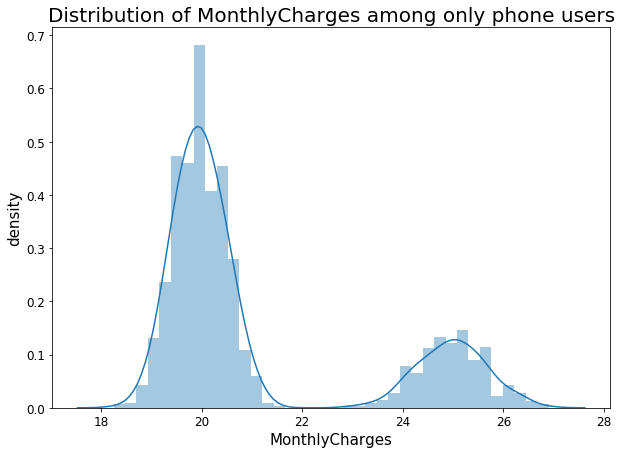

In [26]:
col = 'MonthlyCharges'
plt.figure(figsize=(10,7))
sns.distplot(current_clients_phone_only[col])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among only phone users", fontsize=20)

### Internet services

Text(0.5, 1.0, 'Distribution of MonthlyCharges among Internet users')

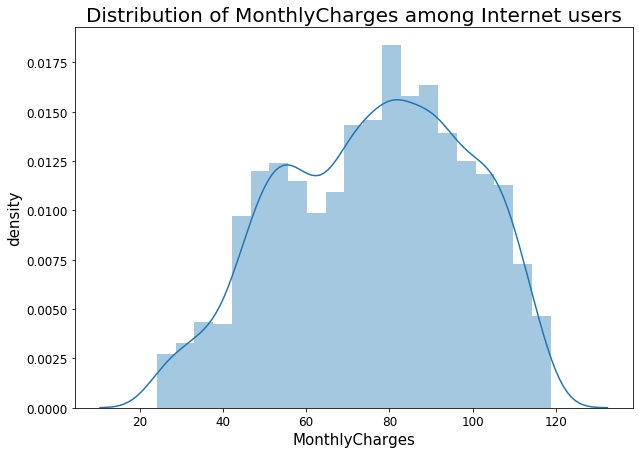

In [27]:
col = 'MonthlyCharges'
plt.figure(figsize=(10,7))
sns.distplot(yes_int[col])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among Internet users", fontsize=20)

#### Only Internet users 

In [28]:
yes_phone = yes_int.PhoneService != 'No'
current_clients_internet_only = yes_int.drop(yes_int[yes_phone].index)

Text(0.5, 1.0, 'Distribution of MonthlyCharges among only Internet users')

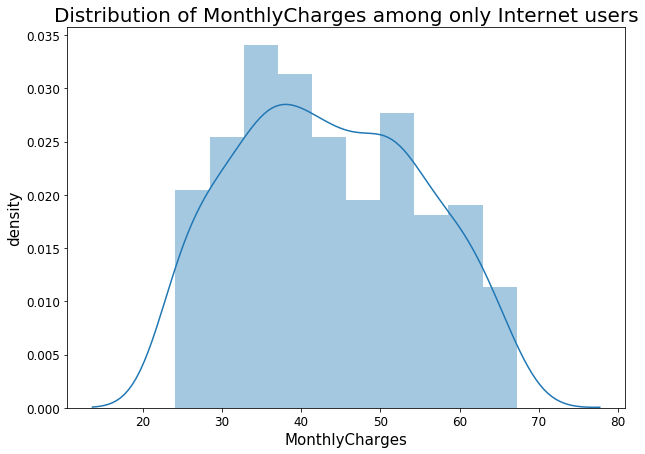

In [29]:
col = 'MonthlyCharges'
plt.figure(figsize=(10,7))
sns.distplot(current_clients_internet_only[col])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among only Internet users", fontsize=20)

## Total charges analysis

Text(0.5, 0.98, 'Relation between tenure and total charges')

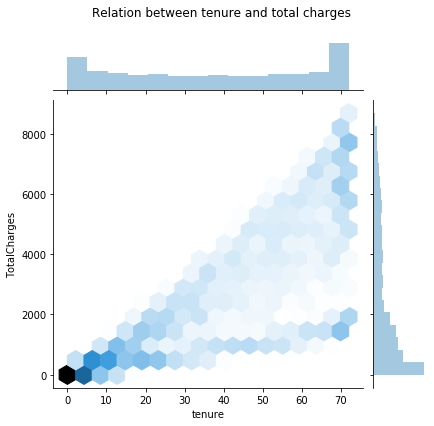

In [30]:
x="tenure"
y="TotalCharges"
g = sns.jointplot(x, y, data=current_clients, kind="hex")
plt.subplots_adjust(top=0.9)
g.fig.suptitle( "Relation between tenure and total charges")

### Phone services

Text(0.5, 1.0, 'Distribution of TotalCharges among phone users')

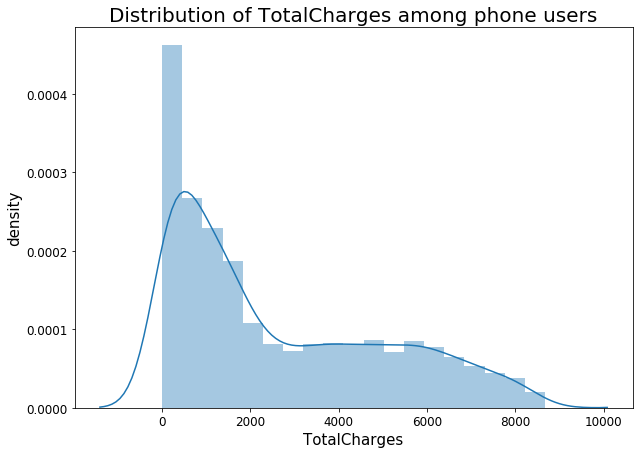

In [31]:
current_clients_phone["TotalCharges"] = pd.to_numeric(current_clients_phone.TotalCharges, errors='coerce').fillna(0, downcast='infer') 
current_clients_phone["SeniorCitizen"] = current_clients_phone.SeniorCitizen.astype('O')
col = 'TotalCharges'
plt.figure(figsize=(10,7))
sns.distplot(current_clients_phone[col])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among phone users", fontsize=20)

#### Only phone users

In [32]:
current_clients_phone_only["TotalCharges"] = pd.to_numeric(current_clients_phone_only.TotalCharges, errors='coerce').fillna(0, downcast='infer') 
current_clients_phone_only["SeniorCitizen"] = current_clients_phone_only.SeniorCitizen.astype('O')

Text(0.5, 1.0, 'Distribution of TotalCharges among only phone users')

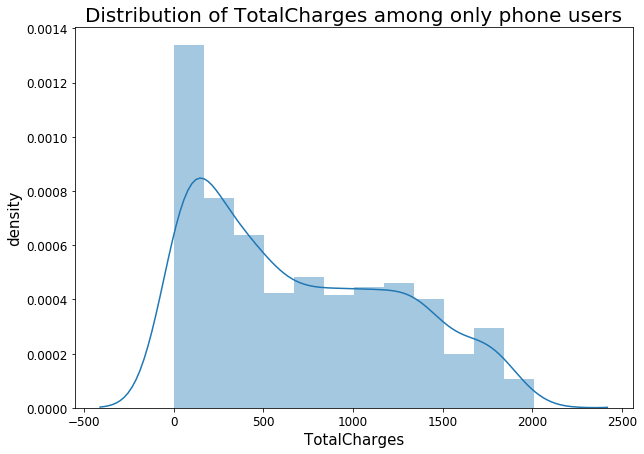

In [33]:
col = 'TotalCharges'
plt.figure(figsize=(10,7))
sns.distplot(current_clients_phone_only[col])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among only phone users", fontsize=20)

### Internet services

/Users/natasuryan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/natasuryan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Distribution of TotalCharges among Internet users')

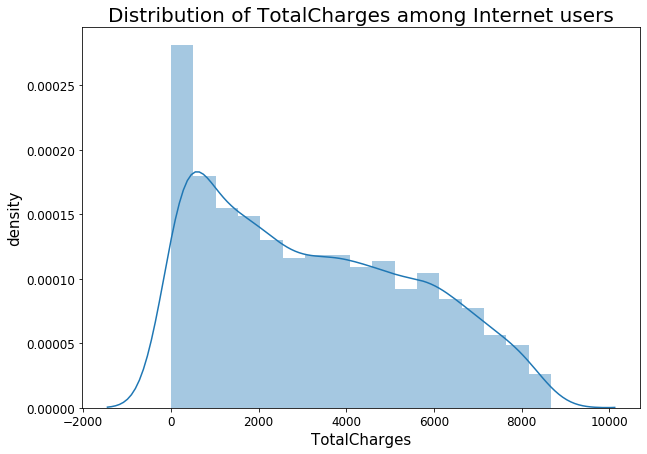

In [34]:
yes_int["TotalCharges"] = pd.to_numeric(yes_int.TotalCharges, errors='coerce').fillna(0, downcast='infer') 
yes_int["SeniorCitizen"] = yes_int.SeniorCitizen.astype('O')
col = 'TotalCharges'
plt.figure(figsize=(10,7))
sns.distplot(yes_int[col])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among Internet users", fontsize=20)

#### Only Internet users

Text(0.5, 1.0, 'Distribution of TotalCharges among only Internet users')

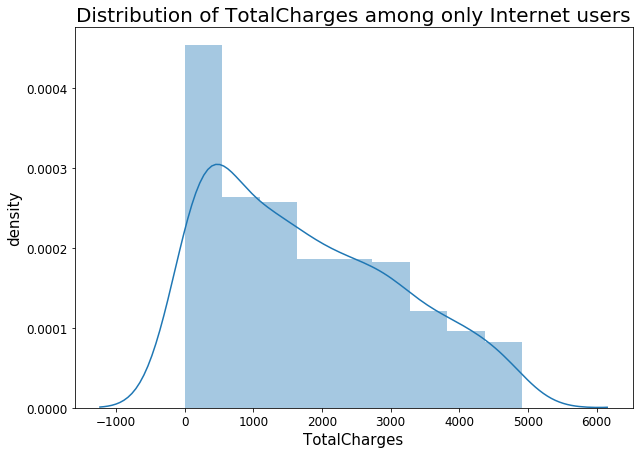

In [35]:
current_clients_internet_only["TotalCharges"] = pd.to_numeric(current_clients_internet_only.TotalCharges, errors='coerce').fillna(0, downcast='infer') 
current_clients_internet_only["SeniorCitizen"] = current_clients_internet_only.SeniorCitizen.astype('O')
col = 'TotalCharges'
plt.figure(figsize=(10,7))
sns.distplot(current_clients_internet_only[col])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(col, fontsize=15)
plt.ylabel("density", fontsize=15)
plt.title(f"Distribution of {col} among only Internet users", fontsize=20)

# Clients clustering

## Age and gender dependence


### on Monthly Charges

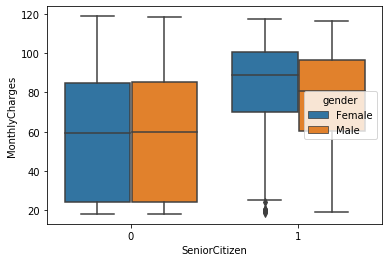

In [40]:
sns.boxplot(data=current_clients, x="SeniorCitizen", y="MonthlyCharges", hue="gender")

### on Total Charges 

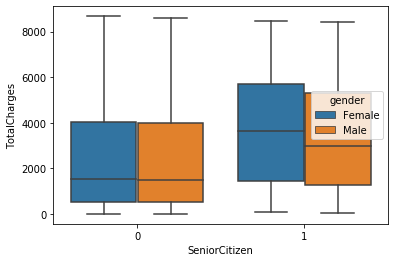

In [42]:
sns.boxplot(data=current_clients, x="SeniorCitizen", y="TotalCharges", hue="gender")

### on additional services

#### protection

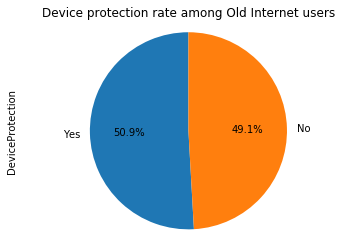

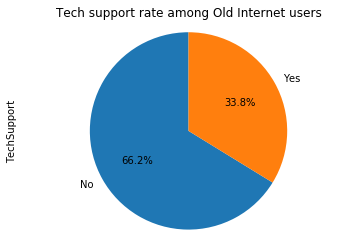

In [53]:
old_clients = yes_int[yes_int.SeniorCitizen == 1]
old_clients.DeviceProtection.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Device protection rate among Old Internet users')
plt.show()

old_clients.TechSupport.value_counts().plot.pie(autopct='%1.1f%%',startangle =90).axis('equal')
plt.title('Tech support rate among Old Internet users')
plt.show()